## <font color="0099FF">验证VGG_256的准确率</font>

###  创建模型并导入权重
导入的是第22轮训练的，准确率高达93.59%的权重

In [1]:
from models.vgg_256 import Vgg_256
Vgg256 = Vgg_256()
Vgg256.model.load_weights("model_weight/vgg256/vgg256[p22][93.59].hdf5")
Vgg256.compile()

###  在混有50%原始图片和50%加噪和压缩的Val_main验证集上验证
1.直接验证（不采样四次）

In [ ]:
gen = Vgg256.gen('datasets/Val_main',32)
val_result = Vgg256.model.evaluate(gen,steps=1555//32)

Found 1555 images belonging to 10 classes.


In [4]:
print(val_result) # 输出依次为loss和categorical_accuracy

[0.25901997089385986, 0.9290364384651184]


2.采用四次采样取平均的方式预测，并绘制混淆矩阵
> 说明：混淆矩阵的行代表真实类别，列代表预测类别

In [2]:
import numpy as np
import os

In [3]:
confusionMatrix = np.zeros((10,10))
up_path = 'datasets/Val_main'
category = Vgg256.category
for i,camera in enumerate(category):
    for img in os.listdir(os.path.join(up_path,camera)):
        path = os.path.join(up_path,camera,img)
        prob = Vgg256.predict(path)
        j = np.argmax(prob)
        confusionMatrix[i,j] += 1
    print('Finish camera{0}'.format(i))

Finish camera0
Finish camera1
Finish camera2
Finish camera3
Finish camera4
Finish camera5
Finish camera6
Finish camera7
Finish camera8
Finish camera9


In [4]:
# 样本数        
sample_num = np.sum(confusionMatrix)
# 正确预测数
right_num = 0
for i in range(10):
    right_num += confusionMatrix[i,i]
accuracy = right_num/sample_num
print("精确度{0}".format(accuracy))

精确度0.9536977491961415


0-Apple_iPhone6Plus：accuracy=0.9184
1-Canon_PowerShotA640：accuracy=0.9801
2-Sony_DSC-W170：accuracy=0.9816
3-Samsung_GalaxyS5：accuracy=0.8947
4-Huawei_P9：accuracy=0.986
5-Nikon_D70s：accuracy=0.9507
6-OnePlus_A3003：accuracy=0.9608
7-Microsoft_Lumia640LTE：accuracy=0.9557
8-Lenovo_P70A：accuracy=0.9518
9-Xiaomi_RedmiNote3：accuracy=0.9627


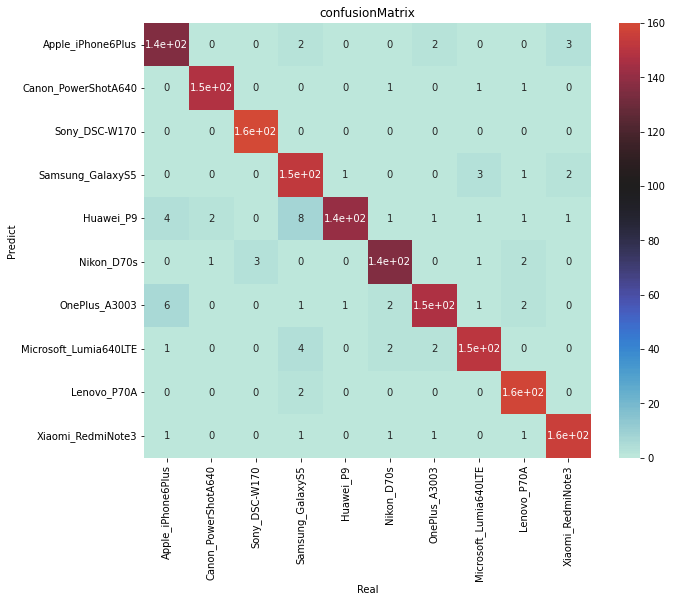

In [26]:
import seaborn as sn
from pandas import DataFrame
import matplotlib.pyplot as plt
# 统计各类准确率
sum1 = np.sum(confusionMatrix,axis=0)
for i,t in enumerate(category):
    print('{0}-{1}：accuracy={2:.4}'.format(i,t,confusionMatrix[i,i]/sum1[i]))
# 绘制混淆矩阵
df  = DataFrame(confusionMatrix,index=category,columns=category,dtype=int)
plt.figure(figsize = (10, 8))
sn.heatmap(df,center=100,annot=True)
plt.ylabel('Predict')
plt.xlabel('Real')
plt.title('confusionMatrix')
plt.show()

可以看出对三星和苹果的预测准确率比较低

## <font color="0099FF">验证VGG_256的在无噪声验证集准确率</font>

In [1]:
from models.vgg_256 import Vgg_256
import numpy as np
import os

Vgg256 = Vgg_256()
Vgg256.model.load_weights("model_weight/vgg256/vgg256[p22][93.59].hdf5")
Vgg256.compile()
confusionMatrix = np.zeros((10,10))
up_path = 'datasets/Val'
category = Vgg256.category

print('============= Begin validate ==================')
for i,camera in enumerate(category):
    for img in os.listdir(os.path.join(up_path,camera)):
        path = os.path.join(up_path,camera,img)
        prob = Vgg256.predict(path)
        j = np.argmax(prob)
        confusionMatrix[i,j] += 1
    print('Finish camera{0}'.format(i))

========== Begin validate ==================
Finish camera0
Finish camera1
Finish camera2
Finish camera3
Finish camera4
Finish camera5
Finish camera6
Finish camera7
Finish camera8
Finish camera9


精确度0.9871345029239766
0-Apple_iPhone6Plus：accuracy=0.9351
1-Canon_PowerShotA640：accuracy=0.9878
2-Sony_DSC-W170：accuracy=1.0
3-Samsung_GalaxyS5：accuracy=0.9778
4-Huawei_P9：accuracy=1.0
5-Nikon_D70s：accuracy=1.0
6-OnePlus_A3003：accuracy=0.9888
7-Microsoft_Lumia640LTE：accuracy=1.0
8-Lenovo_P70A：accuracy=0.989
9-Xiaomi_RedmiNote3：accuracy=0.9889


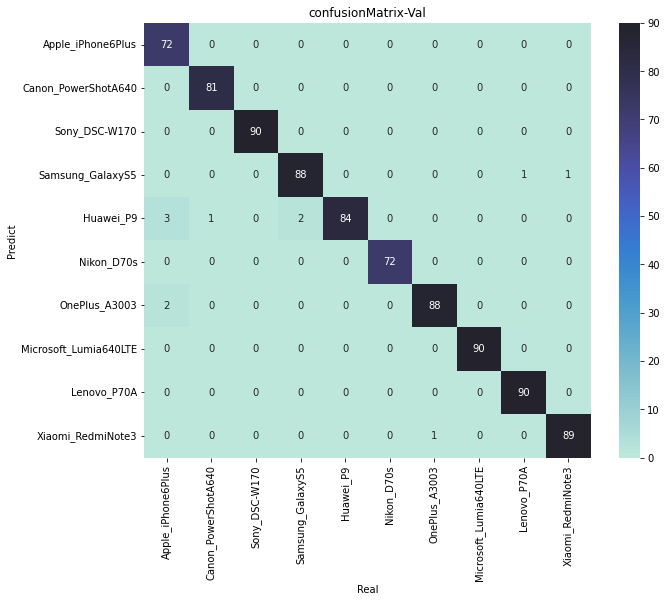

In [2]:
import seaborn as sn
from pandas import DataFrame
import matplotlib.pyplot as plt

# 样本数        
sample_num = np.sum(confusionMatrix)
# 正确预测数
right_num = 0
for i in range(10):
    right_num += confusionMatrix[i,i]
accuracy = right_num/sample_num
print("精确度{0}".format(accuracy))

# 统计各类准确率
sum1 = np.sum(confusionMatrix,axis=0)
for i,t in enumerate(category):
    print('{0}-{1}：accuracy={2:.4}'.format(i,t,confusionMatrix[i,i]/sum1[i]))
# 绘制混淆矩阵
df  = DataFrame(confusionMatrix,index=category,columns=category,dtype=int)
plt.figure(figsize = (10, 8))
sn.heatmap(df,center=100,annot=True)
plt.ylabel('Predict')
plt.xlabel('Real')
plt.title('confusionMatrix-Val')
plt.show()

## <font color="0099FF">验证VGG_256在压缩图片的验证集上的准确率</font>

In [1]:
from models.vgg_256 import Vgg_256
import numpy as np
import os

Vgg256 = Vgg_256()
Vgg256.model.load_weights("model_weight/vgg256/vgg256[p22][93.59].hdf5")
Vgg256.compile()
confusionMatrix = np.zeros((10,10))
up_path = 'datasets/Val_compress'
category = Vgg256.category

print('============= Begin validate ==================')
for i,camera in enumerate(category):
    for img in os.listdir(os.path.join(up_path,camera)):
        path = os.path.join(up_path,camera,img)
        prob = Vgg256.predict(path)
        j = np.argmax(prob)
        confusionMatrix[i,j] += 1
    print('Finish camera{0}'.format(i))

============= Begin validate ==================
Finish camera0
Finish camera1
Finish camera2
Finish camera3
Finish camera4
Finish camera5
Finish camera6
Finish camera7
Finish camera8
Finish camera9


精确度0.9836257309941521
0-Apple_iPhone6Plus：accuracy=0.9595
1-Canon_PowerShotA640：accuracy=0.9873
2-Sony_DSC-W170：accuracy=0.9783
3-Samsung_GalaxyS5：accuracy=0.9674
4-Huawei_P9：accuracy=1.0
5-Nikon_D70s：accuracy=0.973
6-OnePlus_A3003：accuracy=0.9888
7-Microsoft_Lumia640LTE：accuracy=1.0
8-Lenovo_P70A：accuracy=0.989
9-Xiaomi_RedmiNote3：accuracy=0.9889


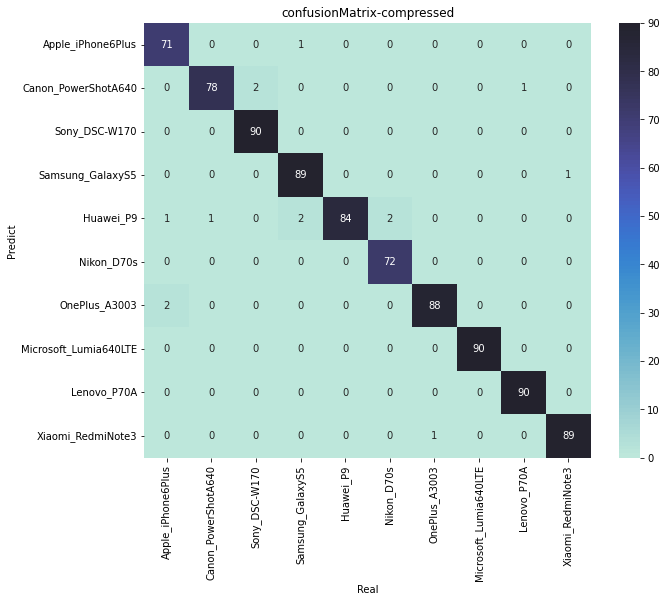

In [2]:
import seaborn as sn
from pandas import DataFrame
import matplotlib.pyplot as plt

# 样本数        
sample_num = np.sum(confusionMatrix)
# 正确预测数
right_num = 0
for i in range(10):
    right_num += confusionMatrix[i,i]
accuracy = right_num/sample_num
print("精确度{0}".format(accuracy))

# 统计各类准确率
sum1 = np.sum(confusionMatrix,axis=0)
for i,t in enumerate(category):
    print('{0}-{1}：accuracy={2:.4}'.format(i,t,confusionMatrix[i,i]/sum1[i]))
# 绘制混淆矩阵
df  = DataFrame(confusionMatrix,index=category,columns=category,dtype=int)
plt.figure(figsize = (10, 8))
sn.heatmap(df,center=100,annot=True)
plt.ylabel('Predict')
plt.xlabel('Real')
plt.title('confusionMatrix-compressed')
plt.show()

## <font color="0099FF">验证VGG_256在加噪图片的验证集上的准确率</font>

In [1]:
from models.vgg_256 import Vgg_256
import numpy as np
import os

Vgg256 = Vgg_256()
Vgg256.model.load_weights("model_weight/vgg256/vgg256[p22][93.59].hdf5")
Vgg256.compile()
confusionMatrix = np.zeros((10,10))
up_path = 'datasets/Val_noise'
category = Vgg256.category

print('============= Begin validate ==================')
for i,camera in enumerate(category):
    for img in os.listdir(os.path.join(up_path,camera)):
        path = os.path.join(up_path,camera,img)
        prob = Vgg256.predict(path)
        j = np.argmax(prob)
        confusionMatrix[i,j] += 1
    print('Finish camera{0}'.format(i))

============= Begin validate ==================
Finish camera0
Finish camera1
Finish camera2
Finish camera3
Finish camera4
Finish camera5
Finish camera6
Finish camera7
Finish camera8
Finish camera9


精确度0.8350877192982457
0-Apple_iPhone6Plus：accuracy=0.7534
1-Canon_PowerShotA640：accuracy=0.974
2-Sony_DSC-W170：accuracy=0.8866
3-Samsung_GalaxyS5：accuracy=0.7364
4-Huawei_P9：accuracy=0.9028
5-Nikon_D70s：accuracy=0.8333
6-OnePlus_A3003：accuracy=0.8108
7-Microsoft_Lumia640LTE：accuracy=0.8068
8-Lenovo_P70A：accuracy=0.8235
9-Xiaomi_RedmiNote3：accuracy=0.8556


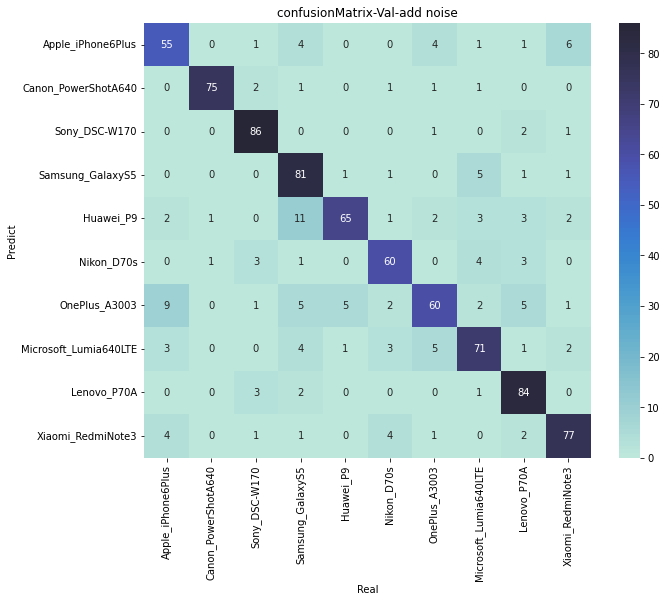

In [2]:
import seaborn as sn
from pandas import DataFrame
import matplotlib.pyplot as plt

# 样本数        
sample_num = np.sum(confusionMatrix)
# 正确预测数
right_num = 0
for i in range(10):
    right_num += confusionMatrix[i,i]
accuracy = right_num/sample_num
print("精确度{0}".format(accuracy))

# 统计各类准确率
sum1 = np.sum(confusionMatrix,axis=0)
for i,t in enumerate(category):
    print('{0}-{1}：accuracy={2:.4}'.format(i,t,confusionMatrix[i,i]/sum1[i]))
# 绘制混淆矩阵
df  = DataFrame(confusionMatrix,index=category,columns=category,dtype=int)
plt.figure(figsize = (10, 8))
sn.heatmap(df,center=100,annot=True)
plt.ylabel('Predict')
plt.xlabel('Real')
plt.title('confusionMatrix-Val-add noise')
plt.show()